# Machine Learning for Marketing Campaing
### Yuri Catramby

# Business Problem

The company had accelerated growth in recent years and was generating profit, but projections for the next 3 years are not promising.

Due to the poor performance of the last marketing campaigns, the company wants to create a customer classification system so that it can help marketing team to create new strategis that generate more profit for the company.

Stakeholder: Marketing Team and CMO

# Data Catalog

Features - Description

* ID                    - Customer Unique Identification
* Year_Birth            - Year of birth
* Education             - Education
* Marital_Status        - Marital Status
* Income                - Annual Income
* Kidhome               - Number of kids
* Teenhome              - Number of teens
* Dt_Customer           - Registration Date
* Recency               - Number of days since the last purchase
* MntWines              - Total spent on wines in the last 2 years
* MntFruits             - Total spent on fruits in the last 2 years
* MntMeatProducts       - Total spent on meat products in the last 2 years
* MntFishProducts       - Total spent on fish in the last 2 years
* MntSweetProducts      - Total spent on sweets in the last 2 years
* MntGoldProds          - Total spent on gols in the last 2 yearss
* NumDealsPurchases     - Number of purchase made with discount
* NumWebPurchases       - Number of purchase made through the company's website
* NumCatalogPurchases   - Number of purchase made using Catalog
* NumStorePurchases     - Number of purchase made in the store
* NumWebVisitsMonth     - Number of visit to the website in the last month
* AcceptedCmp1          - If the customer bought in the first campaign
* AcceptedCmp2          - If the customer bought in the seconde campaign         
* AcceptedCmp3          - If the customer bought in the thrid campaign
* AcceptedCmp4          - If the customer bought in the fourth campaign
* AcceptedCmp5          - If the customer bought in the fifth campaign
* Complain              - If the customer complained in the last 2 years
* Response [TARGET]     - If the customer accepted the offer in the last pilot campainng

# 1.0 Loading Libraries

In [46]:
import time
import datetime
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib as m
import matplotlib.pyplot as plt
from functools import reduce
import random

from scipy.stats import normaltest
from scipy import stats


from sklearn.preprocessing import MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from boruta import BorutaPy


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

import pickle


from sklearn import metrics
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score 


plt.style.use('fivethirtyeight')
%matplotlib inline

from IPython.display import Image

import warnings
warnings.filterwarnings("ignore")

# 2.0 Loading Dataset

In [47]:
df_raw = pd.read_csv('dataset2.csv', sep=';')
df_raw.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,3,6,5,0,0,0,0,0,0,0


# 3.0 Descriptive Analisys

In [48]:
df_desc = df_raw.copy()

In [49]:
print("Number of rows: {}".format(df_desc.shape[0]))
print("Number of features: {}".format(df_desc.shape[1]))

Number of rows: 2240
Number of features: 27


In [50]:
# Data Type
df_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [51]:
# Unique values by feature
df_desc.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
dtype: int64

In [52]:
# Missing Values
df_desc.isnull().sum().sort_values(ascending = False)

Income                 24
ID                      0
MntGoldProds            0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
NumDealsPurchases       0
MntSweetProducts        0
Year_Birth              0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

In [53]:
# Numerical
num_atrib = df_desc.select_dtypes(include=['int64', 'float64'])

# Categorical
cat_atrib = df_desc.select_dtypes(exclude=['int64', 'float64'])

## 3.1 Numerical Features

In [54]:
kurt = pd.DataFrame(num_atrib.apply(lambda x: x.kurtosis())).T
skew = pd.DataFrame(num_atrib.apply(lambda x: x.skew())).T
desc = pd.DataFrame(num_atrib.describe())

df_stats = pd.concat([desc,  kurt, skew]).T.reset_index()
df_stats.columns = ['atributos','count', 'mean', 'std','min', '25%', '50%', '75%', 'max', 'kurtosis', 'skew']
df_stats

,atributos,count,mean,std,min,25%,50%,75%,max,kurtosis,skew
0,ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0,-1.190028,0.039832
1,Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0,0.717464,-0.349944
2,Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0,159.636700,6.763487
3,Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0,-0.779661,0.635288
4,Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0,-0.986235,0.407115
5,Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0,-1.201897,-0.001987
6,MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0,0.598744,1.175771
7,MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0,4.050976,2.102063
8,MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0,5.516724,2.083233
9,MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0,3.096461,1.919769


**Distribution Plot - Income**

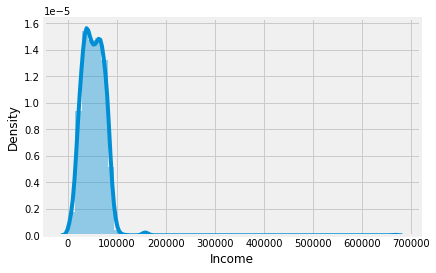

In [55]:
sns.distplot(df_desc['Income'])
plt.show()

A positive skewness indicates a greater concentration of data on the left side of the distribution, that is, the most of the customer earn up to 100,000 per year

**Absoluty Frequency**

In [56]:
lista = ['Complain', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
dict_bin = {}

for i in lista:
    dict_bin[i] = df_desc.groupby(i).size()
    df_unit = pd.DataFrame(dict_bin)
df_unit

,Complain,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,2219,2096,2210,2077,2073,2077,1906
1,21,144,30,163,167,163,334


**Relative Frequency**

In [57]:
for i in lista:
    dict_bin[i] = df_desc.groupby(i).size() / df_desc[i].shape[0]
    df_prop = pd.DataFrame(dict_bin)
df_prop

,Complain,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,0.990625,0.935714,0.986607,0.927232,0.925446,0.927232,0.850893
1,0.009375,0.064286,0.013393,0.072768,0.074554,0.072768,0.149107


We can notice that the best campaign was the last one

## 3.2 Categorical Features

In [58]:
pd.DataFrame(cat_atrib.nunique().sort_values(ascending=False)).rename(columns={0:'Unique Values'})

,Unique Values
Dt_Customer,663
Marital_Status,8
Education,5


In [59]:
pd.DataFrame(cat_atrib.groupby('Marital_Status').size()).reset_index().rename(columns={0:'qtty'})

,Marital_Status,qtty
0,Absurd,2
1,Alone,3
2,Divorced,232
3,Married,864
4,Single,480
5,Together,580
6,Widow,77
7,YOLO,2


In [60]:
pd.DataFrame(cat_atrib.groupby('Education').size()).reset_index().rename(columns={0:'qtty'})

,Education,qtty
0,2n Cycle,203
1,Basic,54
2,Graduation,1127
3,Master,370
4,PhD,486


# 4.0 EDA - Exploratory Data Analisys

In [61]:
df_exp = df_desc.copy()

In [62]:
# Numerical
num_atrib = df_exp.select_dtypes(include=['int64', 'float64']).drop('ID', axis=1)

# Categorical
cat_atrib = df_exp.select_dtypes(exclude=['int64', 'float64'])

In [63]:
print(f'Numerial Features: {num_atrib.columns}')
print(f'Categorical Features: {cat_atrib.columns}')

Numerial Features: Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')
Categorical Features: Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')


## 4.1 Target

We can seen that the target variable is unbalanced

<AxesSubplot:xlabel='Response', ylabel='Count'>

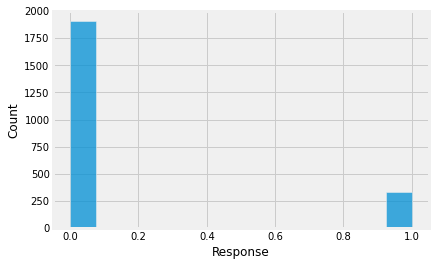

In [64]:
sns.histplot(df_exp['Response'])

In [65]:
df_exp.groupby('Response').size()

Response
0    1906
1     334
dtype: int64

## 4.2 Numerical Features

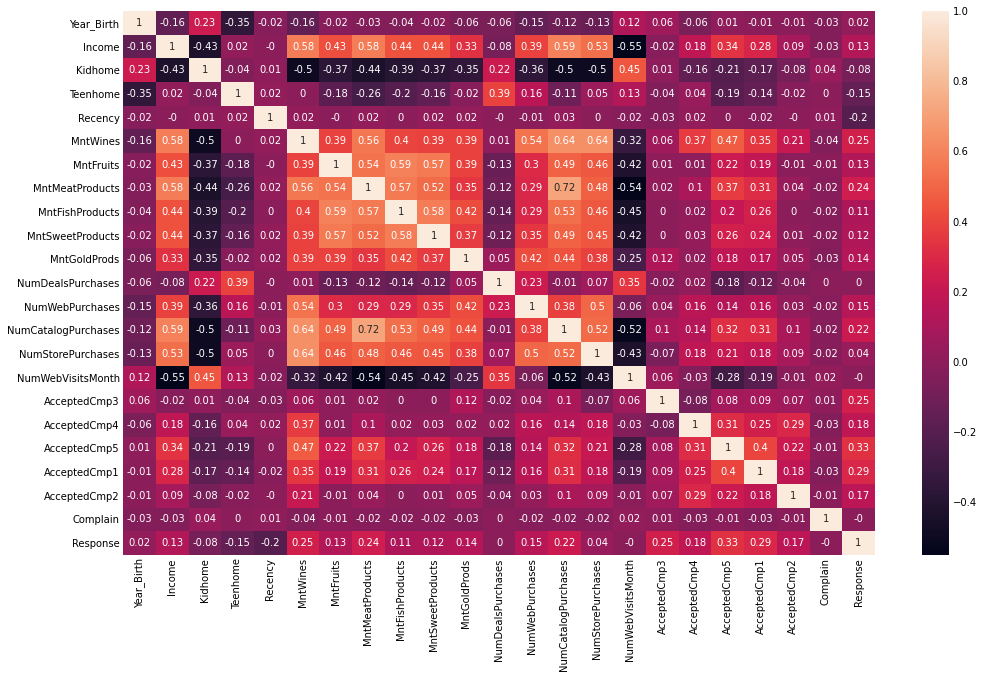

In [66]:
plt.figure(figsize=(15,10))

col_corr = num_atrib.columns

corr = df_exp[col_corr].corr(method = 'pearson').round(2)

sns.heatmap(corr, annot=True)

plt.show()

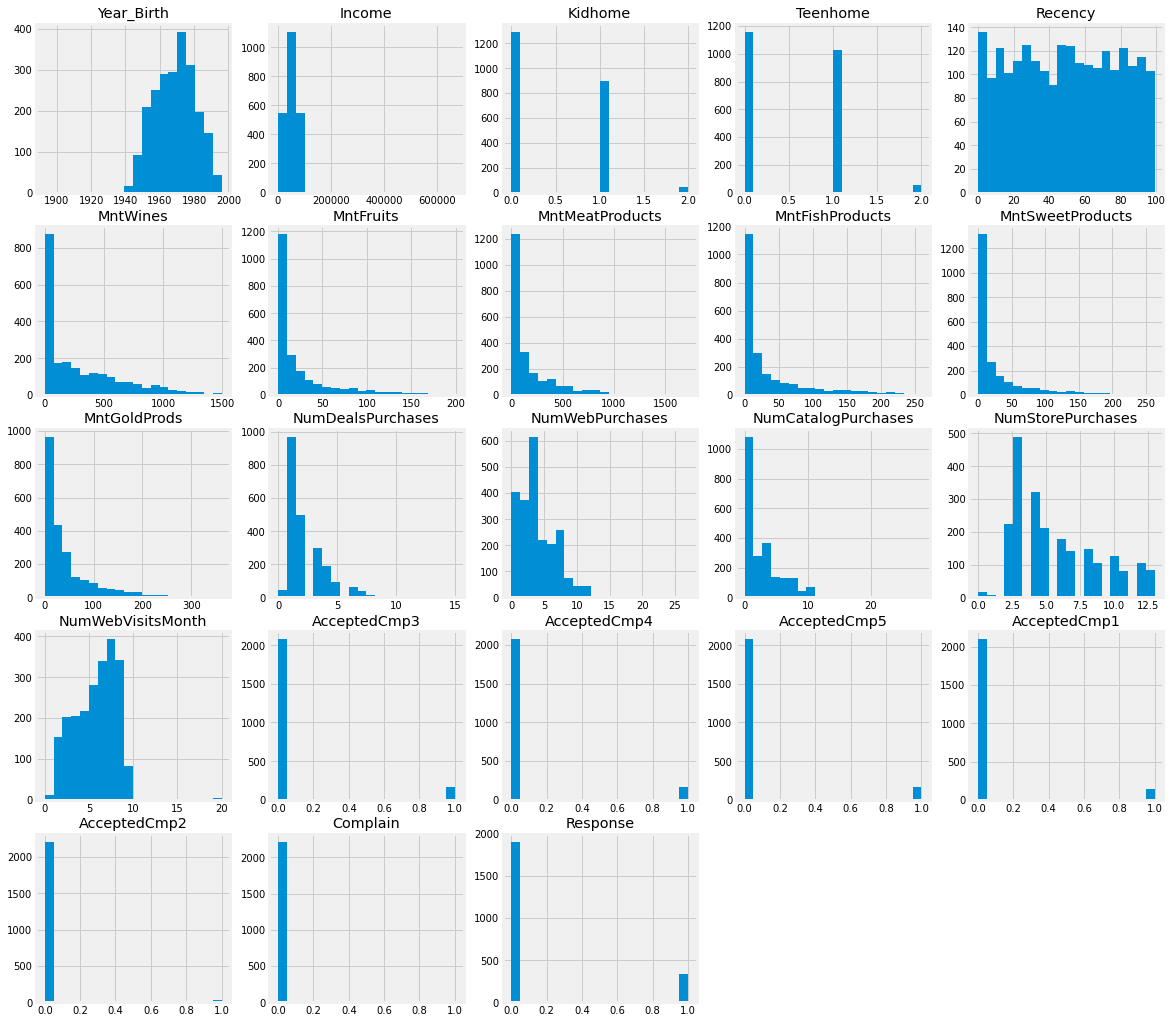

In [67]:
figure = plt.figure(figsize=(18,18))

len_cols = len(col_corr)

for i in range(len_cols):
    figure.add_subplot(5, 5, i+1)
    plt.title(col_corr[i])
    df_exp[col_corr[i]].hist(bins=20)
plt.show()

## 4.3 Categorical Features

The number of visits is lower for people who bought in the last campaign.

This may indicate that they are new customers and that they got to know the company through the last campaign.

<AxesSubplot:xlabel='Response', ylabel='NumWebVisitsMonth'>

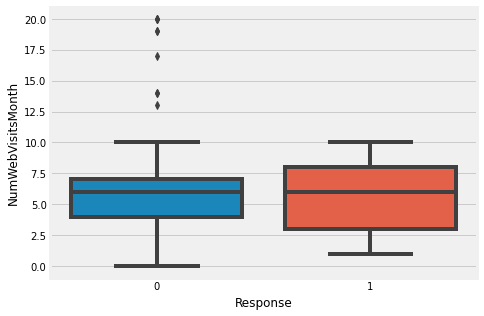

In [68]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x = 'Response', y = 'NumWebVisitsMonth', data = df_exp[['Response', 'NumWebVisitsMonth']])

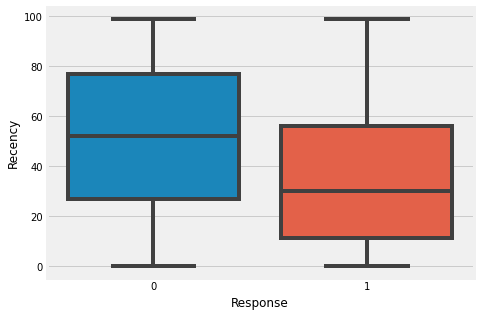

In [69]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x = 'Response', y = 'Recency', data = df_exp[['Response', 'Recency']])
plt.show()

People who bought in the last campaign tend to spend more money on Gold Products

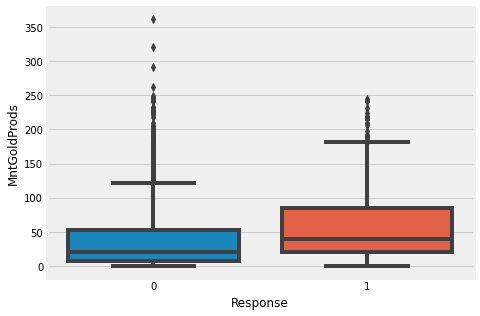

In [70]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x = 'Response', y = 'MntGoldProds', data = df_exp[['Response', 'MntGoldProds']])
plt.show()

We can create a new category:
- Alone + Absurd + YOLO + window + Single

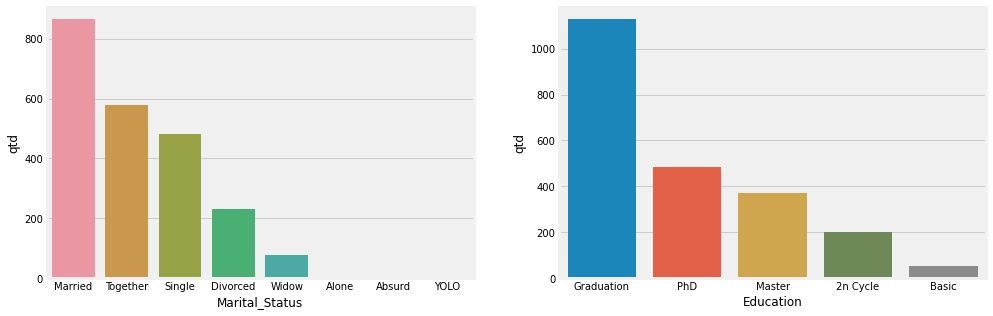

In [71]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
df_aux_1 = (pd.DataFrame(df_exp.groupby('Marital_Status').size(), columns = ['qtd'])
             .reset_index()
             .sort_values('qtd', ascending= False))

sns.barplot( x = 'Marital_Status', y = 'qtd', data = df_aux_1)

plt.subplot(1, 2, 2)
df_aux_2 = (pd.DataFrame(df_exp.groupby('Education').size(), columns = ['qtd'])
             .reset_index()
             .sort_values('qtd', ascending= False))

sns.barplot( x = 'Education', y = 'qtd', data = df_aux_2)
plt.show()

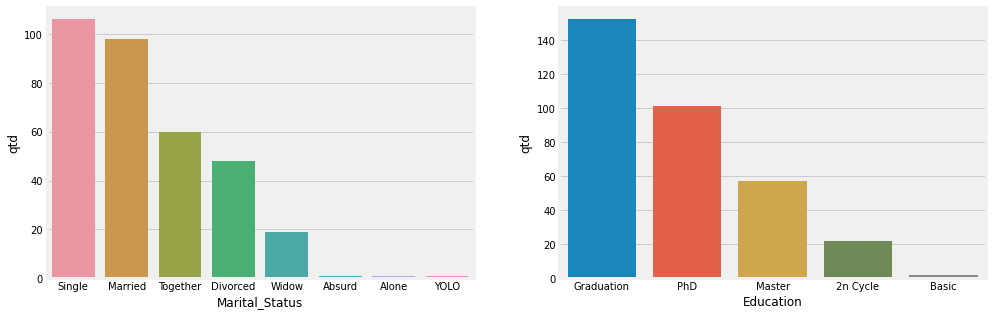

In [72]:
plt.figure(figsize = (15, 5))

df_aux = df_exp[df_exp['Response']==1]

plt.subplot(1, 2, 1)
df_aux_3 = pd.DataFrame(df_aux.groupby('Marital_Status').size(), columns = ['qtd'])\
             .reset_index()\
             .sort_values('qtd', ascending= False)

sns.barplot( x = 'Marital_Status', y = 'qtd', data = df_aux_3)

plt.subplot(1, 2, 2)
df_aux_4 = pd.DataFrame(df_aux.groupby('Education').size(), columns = ['qtd'])\
             .reset_index()\
             .sort_values('qtd', ascending= False)

sns.barplot( x = 'Education', y = 'qtd', data = df_aux_4)
plt.show()

## 4.4 Hypothesis Creation

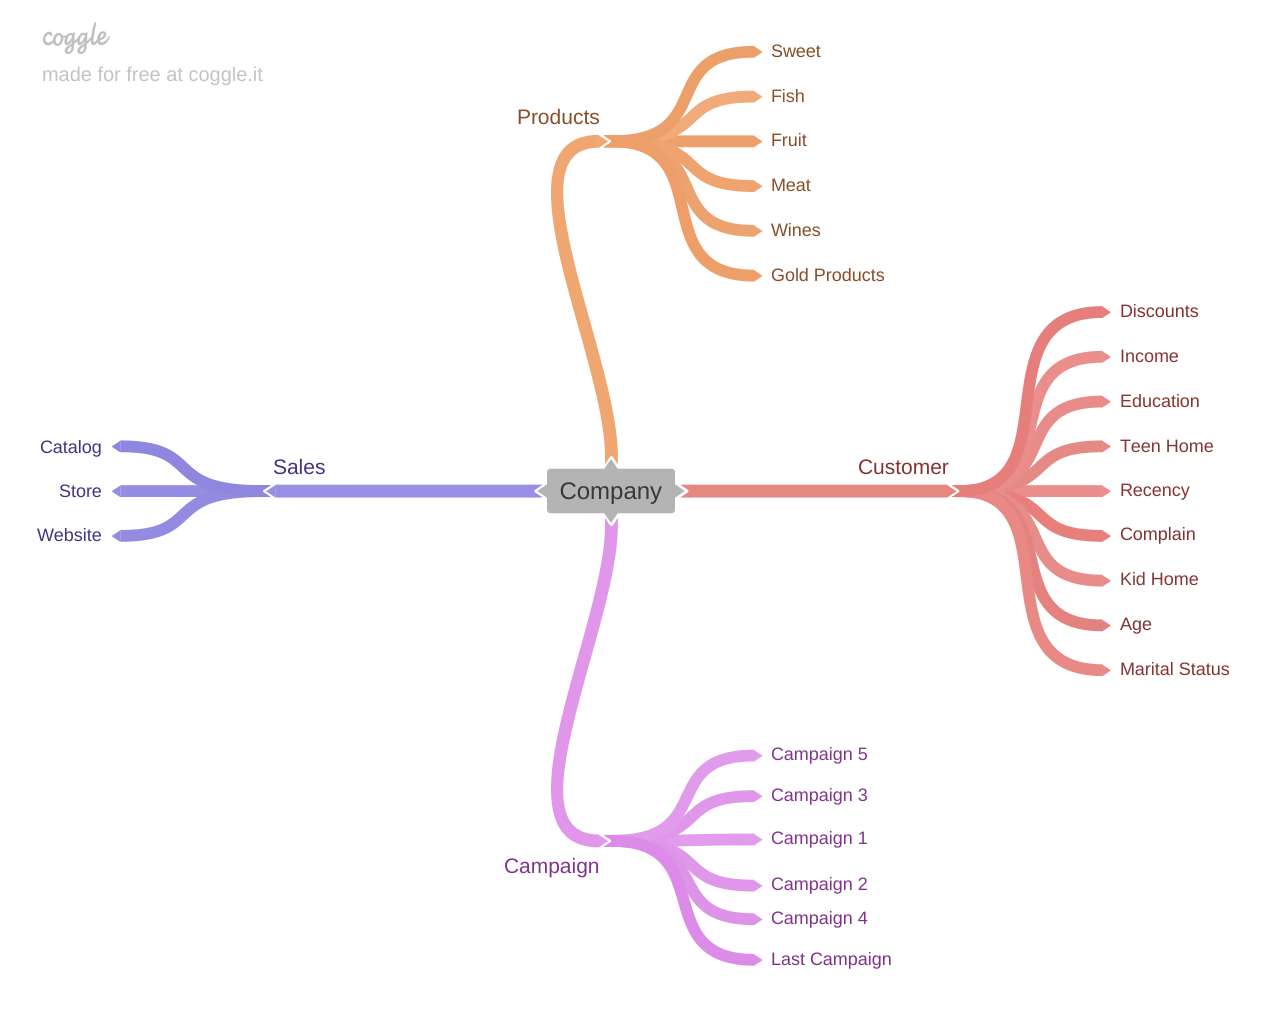

In [73]:
Image('mental_map.png')

### 4.4.1 Customer Hypothesis

**1.** Customers with higher annual salary buy more
   
**2.** Customers with more purchases made at a discount buy more

**3.** Single customers buy more

**4.** Customers over 30 years old buy more

**5.** Graduation is the level of education that we have more clients

**6.** Customers who have a higher level of education buy more

**7.** Customers with more teenagers at home buy more

**8.** Customers with more children at home buy less

### 4.4.2 Sales Hypothesis

 **1.** The website has the highest sales volume

### 4.4.3 Product Hypothesis

**1.** Customers who spend more on fish also spend more on wines

## 4.4 Evaluating Hypothesis

**1.** Customers with higher annual salary buy more

False. Customer who bought more are in the second highest income category

In [74]:
# 4 classes based on data distribution
def range_income(income):
        if income <= 30000:
            return '0 - 30k'
        elif 30000 < income <= 60000:
            return '30k - 60k'
        elif 60000 < income <= 90000:
            return '60k - 90k'
        else:
            return '> 90k'

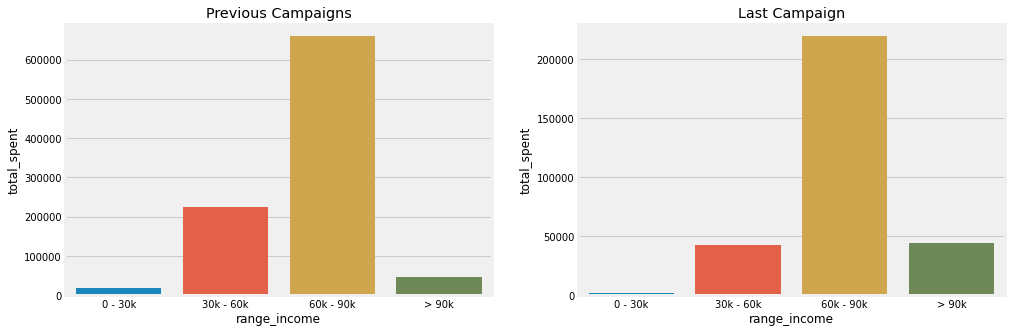

In [75]:
h_aux1 = df_exp.copy()        
h_aux1['range_income'] = h_aux1['Income'].apply(range_income)

col_list = ['MntSweetProducts', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntWines']
h_aux1['total_spent'] = h_aux1[col_list].sum(axis=1)

# Gráfico
plt.figure(figsize = (15, 5))


plt.subplot(1, 2, 1)
plt.title('Previous Campaigns')
h_aux1_1 = h_aux1[['range_income', 'total_spent']][h_aux1['Response']!=1].groupby('range_income').sum().reset_index()

sns.barplot( x = 'range_income', y = 'total_spent', data = h_aux1_1 )

plt.subplot(1, 2, 2)
plt.title('Last Campaign')
h_aux1_1_r = h_aux1[['range_income', 'total_spent']][h_aux1['Response']==1].groupby('range_income').sum().reset_index()

sns.barplot(x ='range_income', y='total_spent', data=h_aux1_1_r)


plt.show()

**2. Customers with more purchases made at a discount buy more**

False. Customers who had only 1 purchase with discount spent much more

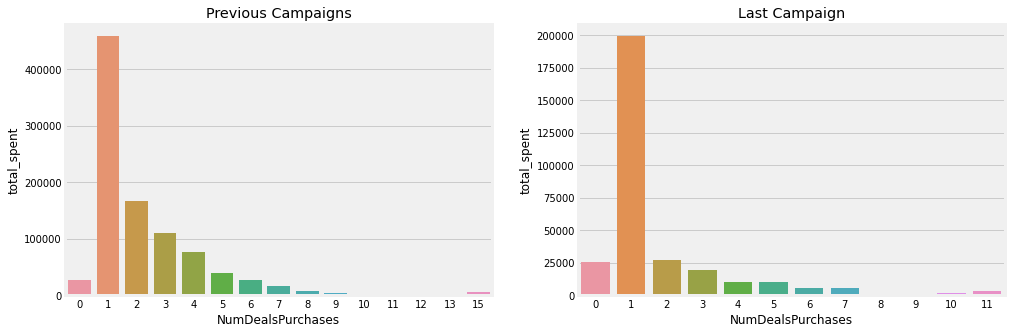

In [76]:
h_aux2 = df_exp.copy()     

col_list = ['MntSweetProducts', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntWines']
h_aux2['total_spent'] = h_aux2[col_list].sum(axis=1)


plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.title('Previous Campaigns')
h_aux2_1 = h_aux2[['NumDealsPurchases', 'total_spent']][h_aux1['Response']!=1].groupby('NumDealsPurchases').sum().reset_index()

sns.barplot( x = 'NumDealsPurchases', y = 'total_spent', data = h_aux2_1 )

plt.subplot(1, 2, 2)
plt.title('Last Campaign')
h_aux2_1r = h_aux2[['NumDealsPurchases', 'total_spent']][h_aux2['Response']==1].groupby('NumDealsPurchases').sum().reset_index()

sns.barplot( x = 'NumDealsPurchases', y = 'total_spent', data = h_aux2_1r )


plt.show()

**3. Single customers buy more**

False and True. In previous campaigns, people who were married or together had a greater share of expenses. But in the last campaign, single people were more represented.

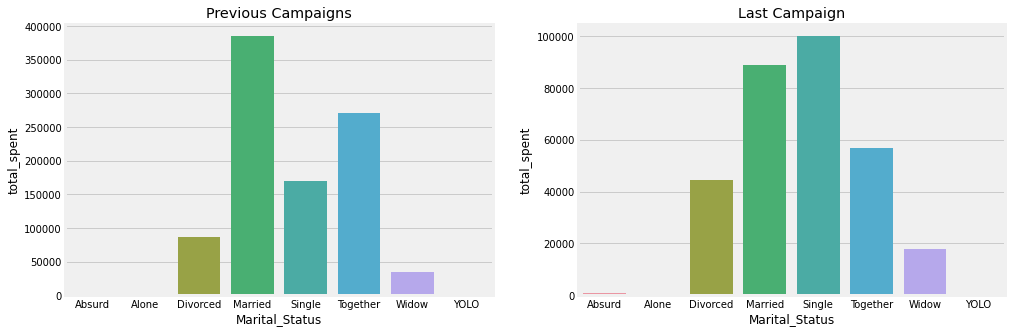

In [77]:
h_aux3 = df_exp.copy()     

col_list = ['MntSweetProducts', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntWines']
h_aux3['total_spent'] = h_aux3[col_list].sum(axis=1)

# Gráfico
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.title('Previous Campaigns')
h_aux3_1 = h_aux3[['Marital_Status', 'total_spent']][h_aux3['Response']!=1].groupby('Marital_Status').sum().reset_index()
sns.barplot( x = 'Marital_Status', y = 'total_spent', data = h_aux3_1 )

plt.subplot(1, 2, 2)
plt.title('Last Campaign')
h_aux3_1r = h_aux3[['Marital_Status', 'total_spent']][h_aux3['Response']==1].groupby('Marital_Status').sum().reset_index()
sns.barplot( x = 'Marital_Status', y = 'total_spent', data = h_aux3_1r )


plt.show()

**4. Customers over 30 years old buy more**

True. Customer between 40 and 70 years old are the public that spent the most

In [78]:
# 7 classes based on data distribution
def range_age(age):
        if age <= 10:
            return '0 - 10'
        elif 10 < age <= 20:
            return '10 - 20'
        elif 20 < age <= 30:
            return '20 - 30'
        elif 35 < age <= 40:
            return '30 - 40'
        elif 40 < age <= 50:
            return '40 - 50'
        elif 50 < age <= 60:
            return '50 - 60'
        elif 60 < age <= 70:
            return '60 - 70'
        elif 70 < age <= 80:
            return '70 - 80'
        else:
            return '> 90'

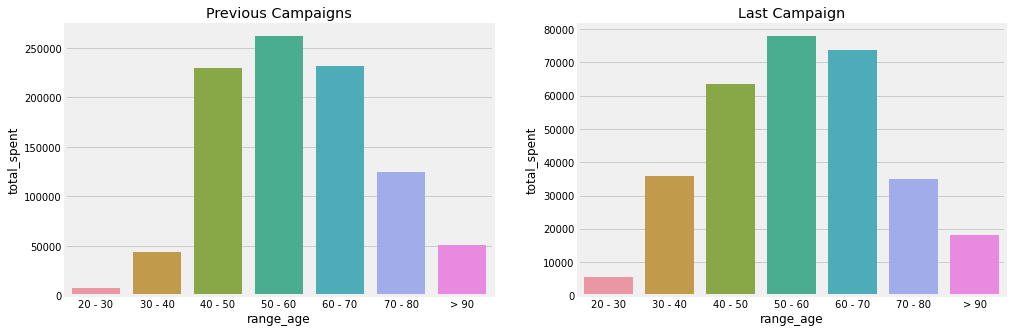

In [79]:
h_aux4 = df_exp.copy()

h_aux4['age'] = h_aux4['Year_Birth'].apply(lambda x: datetime.date.today().year - x).astype('int64')

h_aux4['range_age'] = h_aux4['age'].apply(range_age)

col_list = ['MntSweetProducts', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntWines']
h_aux4['total_spent'] = h_aux4[col_list].sum(axis=1)


plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.title('Previous Campaigns')
h_aux4_1 = h_aux4[['range_age', 'total_spent']][h_aux4['Response']!=1].groupby('range_age').sum().reset_index()
sns.barplot( x = 'range_age', y = 'total_spent', data = h_aux4_1 )

plt.subplot(1, 2, 2)
plt.title('Last Campaign')
h_aux4_1r = h_aux4[['range_age', 'total_spent']][h_aux4['Response']==1].groupby('range_age').sum().reset_index()
sns.barplot( x = 'range_age', y = 'total_spent', data = h_aux4_1r )



plt.show()

**5. Graduation is the level of education that we have more clients**

True

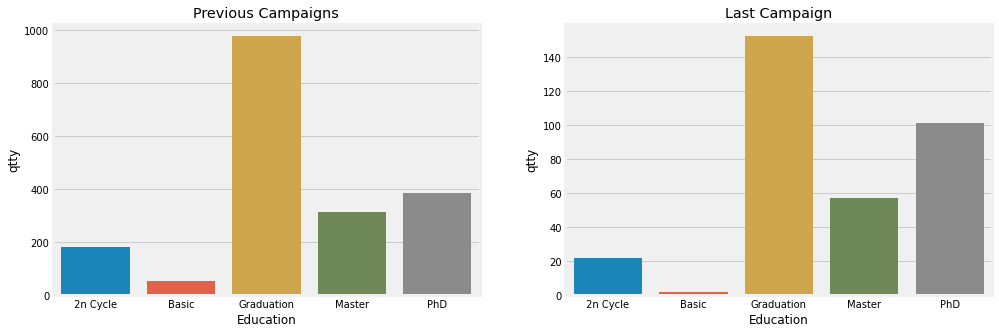

In [80]:
# Amount of customer
h_aux5 = df_exp.copy()     

col_list = ['MntSweetProducts', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntWines']
h_aux5['total_spent'] = h_aux5[col_list].sum(axis=1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.title('Previous Campaigns')
h_aux5_1 = h_aux5[['Education']][h_aux5['Response']!=1].groupby('Education').size().reset_index().rename(columns={0:'qtty'})
sns.barplot( x = 'Education', y = 'qtty', data = h_aux5_1 )

plt.subplot(1, 2, 2)
plt.title('Last Campaign')
h_aux5_1_r = h_aux5[['Education']][h_aux5['Response']==1].groupby('Education').size().reset_index().rename(columns={0:'qtty'})
sns.barplot( x = 'Education', y = 'qtty', data = h_aux5_1_r )

plt.show()

**6. Customers who have a higher level of education buy more**

False.

The average ticket of customers who have Graduation is very similar to those with a PhD.

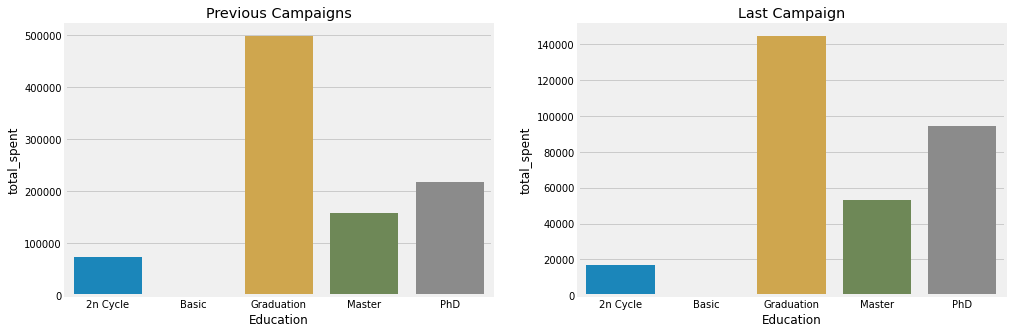

In [81]:
# Total Spent
h_aux6 = df_exp.copy()     

col_list = ['MntSweetProducts', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntWines']
h_aux6['total_spent'] = h_aux6[col_list].sum(axis=1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.title('Previous Campaigns')
h_aux6_1 = h_aux5[['Education', 'total_spent']][h_aux6['Response']!=1].groupby('Education').sum().reset_index()
sns.barplot( x = 'Education', y = 'total_spent', data = h_aux6_1 )

plt.subplot(1, 2, 2)
plt.title('Last Campaign')
h_aux6_1_r = h_aux5[['Education', 'total_spent']][h_aux6['Response']==1].groupby('Education').sum().reset_index()
sns.barplot( x = 'Education', y = 'total_spent', data = h_aux6_1_r )

plt.show()

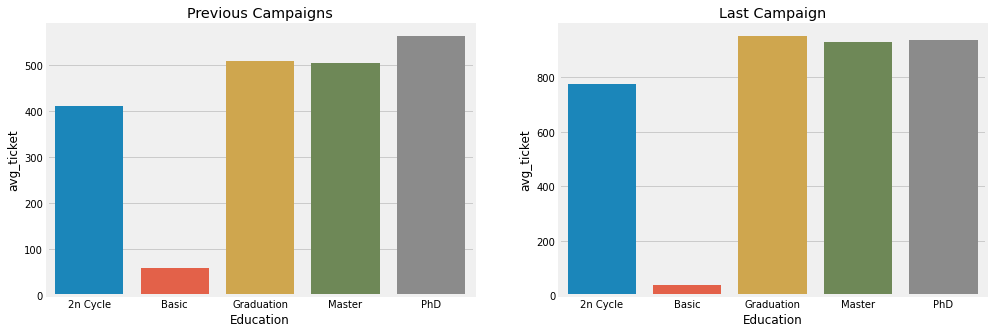

In [82]:
# Average Ticket
h_aux6 = df_exp.copy()     

col_list = ['MntSweetProducts', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntWines']
h_aux6['total_spent'] = h_aux6[col_list].sum(axis=1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.title('Previous Campaigns')
h_aux6_1 = h_aux6[['Education', 'total_spent']][h_aux6['Response']!=1].groupby('Education').mean().reset_index().rename(columns={'total_spent':'avg_ticket'})
sns.barplot( x = 'Education', y = 'avg_ticket', data = h_aux6_1 )

plt.subplot(1, 2, 2)
plt.title('Last Campaign')
h_aux6_1_r = h_aux6[['Education', 'total_spent']][h_aux6['Response']==1].groupby('Education').mean().reset_index().rename(columns={'total_spent':'avg_ticket'})
sns.barplot( x = 'Education', y = 'avg_ticket', data = h_aux6_1_r )

plt.show()

**7. Customers with more teenagers at home buy more**

False.

In general, those with teenagers at home spend less

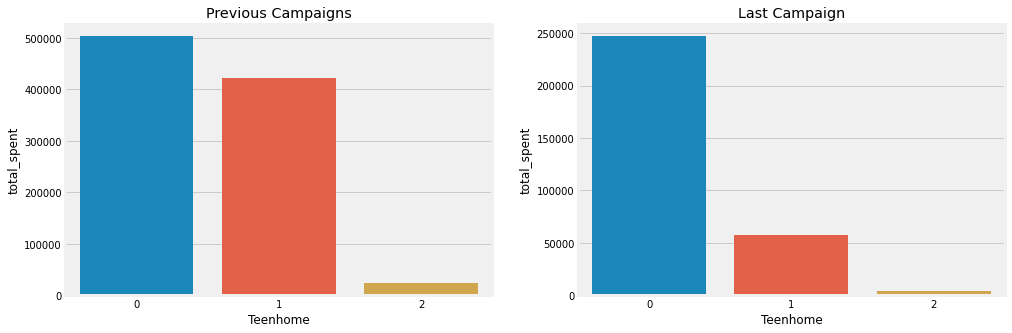

In [83]:
h_aux7 = df_exp.copy()     

col_list = ['MntSweetProducts', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntWines']
h_aux7['total_spent'] = h_aux7[col_list].sum(axis=1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.title('Previous Campaigns')
h_aux7_1 = h_aux7[['Teenhome', 'total_spent']][h_aux7['Response']!=1].groupby('Teenhome').sum().reset_index()
sns.barplot( x = 'Teenhome', y = 'total_spent', data = h_aux7_1 )

plt.subplot(1, 2, 2)
plt.title('Last Campaign')
h_aux7_1_r = h_aux7[['Teenhome', 'total_spent']][h_aux7['Response']==1].groupby('Teenhome').sum().reset_index()
sns.barplot( x = 'Teenhome', y = 'total_spent', data = h_aux7_1_r )

plt.show()

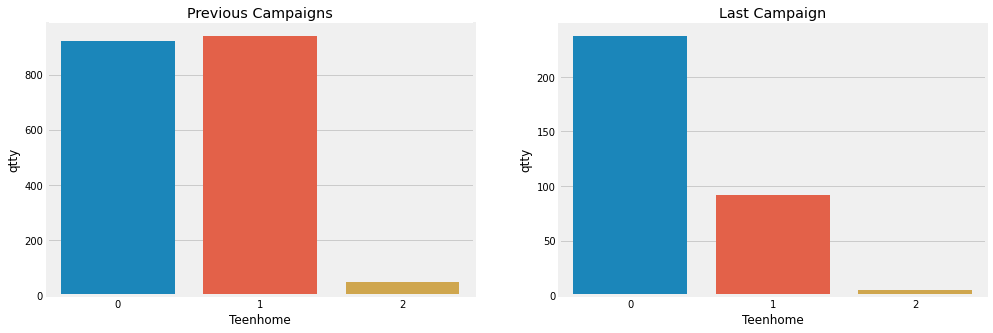

In [84]:
h_aux7 = df_exp.copy()     

col_list = ['MntSweetProducts', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntWines']
h_aux7['total_spent'] = h_aux7[col_list].sum(axis=1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.title('Previous Campaigns')
h_aux7_1 = h_aux7[['Teenhome']][h_aux7['Response']!=1].groupby('Teenhome').size().reset_index().rename(columns={0:'qtty'})
sns.barplot( x = 'Teenhome', y = 'qtty', data = h_aux7_1 )

plt.subplot(1, 2, 2)
plt.title('Last Campaign')
h_aux7_1_r = h_aux7[['Teenhome']][h_aux7['Response']==1].groupby('Teenhome').size().reset_index().rename(columns={0:'qtty'})
sns.barplot( x = 'Teenhome', y = 'qtty', data = h_aux7_1_r )

plt.show()

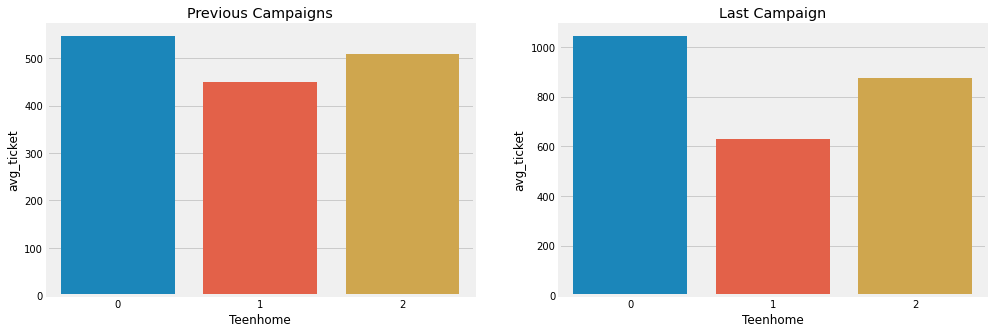

In [85]:
h_aux7 = df_exp.copy()     

col_list = ['MntSweetProducts', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntWines']
h_aux7['total_spent'] = h_aux7[col_list].sum(axis=1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.title('Previous Campaigns')
h_aux7_1 = h_aux7[['Teenhome', 'total_spent']][h_aux7['Response']!=1].groupby('Teenhome').mean().reset_index().rename(columns={'total_spent':'avg_ticket'})
sns.barplot( x = 'Teenhome', y = 'avg_ticket', data = h_aux7_1 )

plt.subplot(1, 2, 2)
plt.title('Last Campaign')
h_aux7_1_r = h_aux7[['Teenhome', 'total_spent']][h_aux7['Response']==1].groupby('Teenhome').mean().reset_index().rename(columns={'total_spent':'avg_ticket'})
sns.barplot( x = 'Teenhome', y = 'avg_ticket', data = h_aux7_1_r )

plt.show()

**8. Customers with more children at home buy less**

False.

In geral, those without kid at home spend more

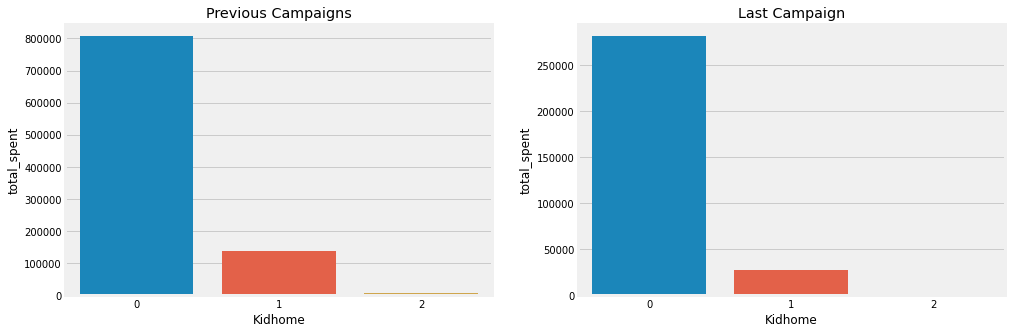

In [86]:
h_aux8 = df_exp.copy()     

col_list = ['MntSweetProducts', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntWines']
h_aux8['total_spent'] = h_aux8[col_list].sum(axis=1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.title('Previous Campaigns')
h_aux8_1 = h_aux8[['Kidhome', 'total_spent']][h_aux8['Response']!=1].groupby('Kidhome').sum().reset_index()
sns.barplot( x = 'Kidhome', y = 'total_spent', data = h_aux8_1 )

plt.subplot(1, 2, 2)
plt.title('Last Campaign')
h_aux8_1_r = h_aux8[['Kidhome', 'total_spent']][h_aux8['Response']==1].groupby('Kidhome').sum().reset_index()
sns.barplot( x = 'Kidhome', y = 'total_spent', data = h_aux8_1_r )

plt.show()

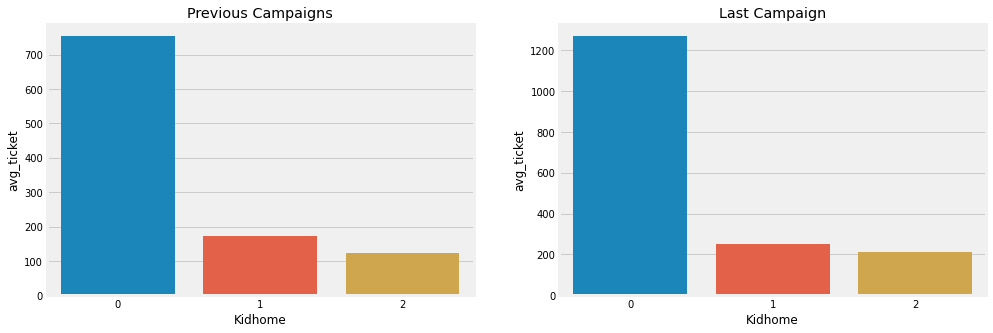

In [87]:
h_aux8 = df_exp.copy()     

col_list = ['MntSweetProducts', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntWines']
h_aux8['total_spent'] = h_aux8[col_list].sum(axis=1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.title('Previous Campaigns')
h_aux8_1 = h_aux8[['Kidhome', 'total_spent']][h_aux8['Response']!=1].groupby('Kidhome').mean().reset_index().rename(columns={'total_spent':'avg_ticket'})
sns.barplot(x = 'Kidhome', y = 'avg_ticket', data = h_aux8_1)

plt.subplot(1, 2, 2)
plt.title('Last Campaign')
h_aux8_1_r = h_aux8[['Kidhome', 'total_spent']][h_aux8['Response']==1].groupby('Kidhome').mean().reset_index().rename(columns={'total_spent':'avg_ticket'})
sns.barplot(x = 'Kidhome', y = 'avg_ticket', data = h_aux8_1_r)

plt.show()

**1. The website has the highest sales volume**

False. The store has the highest number of sales

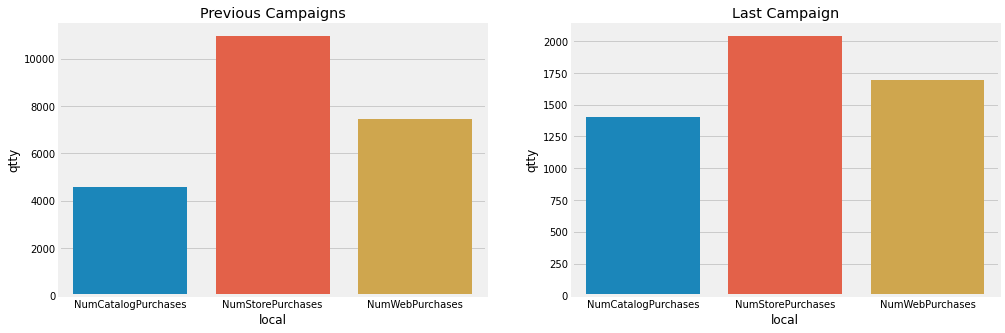

In [88]:
h_aux9 = df_exp.copy()     

col = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

plt.figure(figsize = (15, 5))


plt.subplot(1, 2, 1)
plt.title('Previous Campaigns')
h_aux = h_aux9[h_aux9['Response']!=1][['ID', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]
h_aux = pd.melt(h_aux, id_vars=['ID'], value_vars=col, var_name = 'local', value_name = 'qtty')

h_aux9_1 = h_aux[['local', 'qtty']].groupby('local').sum().reset_index()
sns.barplot(x = 'local', y = 'qtty', data = h_aux9_1)


plt.subplot(1, 2, 2)
plt.title('Last Campaign')
h_aux9_r = h_aux9[h_aux9['Response']==1]
h_aux9_r = h_aux9_r[['ID', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]
h_aux9_r = pd.melt(h_aux9_r, id_vars=['ID'], value_vars=col, var_name = 'local', value_name = 'qtty')

h_aux9_r = h_aux9_r[['local', 'qtty']].groupby('local').sum().reset_index()
sns.barplot( x = 'local', y = 'qtty', data = h_aux9_r)

plt.show()

**1. Customers who spend more on wines also spend more on fish**

False. Customer who spend more on wines also spend more on meat

In [89]:
h_aux10 = df_exp.copy()    

def find_first_max_and_index(lst, position):
    maximum = reduce(lambda x, y: x if (x > y) else y, lst) 
    return col[:4][lst.index(maximum)]

col = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'Response']

h_aux10 = h_aux10[col]

h_aux10['list_products'] = h_aux10.apply(lambda row: row[:4].tolist(), axis=1)
h_aux10['fir_max_product'] = h_aux10['list_products'].apply(lambda x: col[x.index(reduce(lambda a, b: a if (a > b) else b, x))])
h_aux10['sec_max_product'] = h_aux10['list_products'].apply(lambda x: col[x.index(reduce(lambda a, b: a if ((a > b and a != sorted(x)[-1]) or (a < b and b == sorted(x)[-1])) else b, sorted(x)))])

dict_replace = {
    'MntWines': 'Wines',
    'MntFruits': 'Fruits',
    'MntMeatProducts': 'Meat',
    'MntFishProducts': 'Sweet'
}
h_aux10 = h_aux10.apply(lambda x: x.replace(dict_replace))
h_aux10['new_cat_prod'] = h_aux10['fir_max_product']+'_'+h_aux10['sec_max_product']

dict_replace2 = {
    'Fruits_Wines': 'Wines_Fruits',
    'Meat_Wines': 'Wines_Meat',
    'Sweet_Wines': 'Wines_Sweet',
    'Fruits_Meat': 'Meat_Fruits',
    'Sweet_Meat': 'Meat_Sweet',
    'Fruits_Sweet': 'Sweet_Fruits'
}
h_aux10 = h_aux10.apply(lambda x: x.replace(dict_replace2))

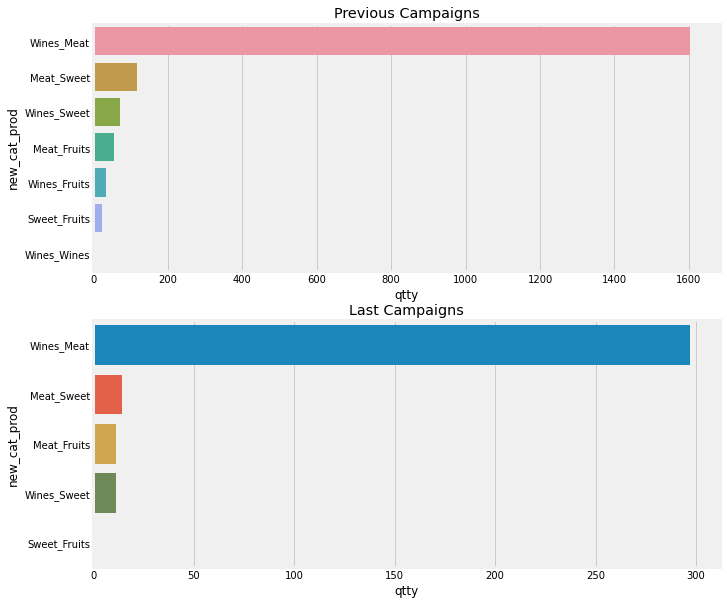

In [90]:
plt.figure(figsize = (10, 10))

plt.subplot(2, 1, 1)
plt.title('Previous Campaigns')
h_aux10_1 = h_aux10[h_aux10['Response']!=1].groupby('new_cat_prod').size().reset_index().rename(columns={0:'qtty'})
sns.barplot(x = 'qtty', y = 'new_cat_prod', orient='h', data = h_aux10_1.sort_values('qtty', ascending=False))

plt.subplot(2, 1, 2)
plt.title('Last Campaigns')
h_aux10_1 = h_aux10[h_aux10['Response']==1].groupby('new_cat_prod').size().reset_index().rename(columns={0:'qtty'})
sns.barplot(x = 'qtty', y = 'new_cat_prod', orient='h', data = h_aux10_1.sort_values('qtty', ascending=False))

plt.show()

# 5.0 Splitting data

In [91]:
df_split = df_raw.copy()

# cols_drop = ['ID', 'Dt_Customer']
# df_split = df_split.drop(cols_drop, axis=1)

X = df_split.drop('Response', axis = 1)
y = df_split[['Response']]

In [92]:
X.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,8,10,4,7,0,0,0,0,0,0
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,1,1,2,5,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,8,2,10,4,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,2,0,4,6,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,3,6,5,0,0,0,0,0,0


In [93]:
test_size = 0.3
seed = 42

X_train_1, X_test_1, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [94]:
print(f'X_train_1: {X_train_1.shape}')
print(f'X_test_1: {X_test_1.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train_1: (1568, 26)
X_test_1: (672, 26)
y_train: (1568, 1)
y_test: (672, 1)


In [95]:
df_train = pd.concat([X_train_1, y_train], axis=1)
print(f'df_train: {df_train.shape}')
df_train.head()

df_train: (1568, 27)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
994,1640,1954,Graduation,Divorced,64587.0,1,1,22/06/2014,49,66,...,1,4,3,0,0,0,0,0,0,0
2162,977,1957,Graduation,Together,47320.0,0,1,01/08/2013,10,200,...,1,8,6,0,0,0,0,0,0,0
906,10150,1961,Graduation,Single,86429.0,0,0,21/11/2013,10,464,...,4,7,2,0,0,0,1,0,0,1
572,8181,1978,2n Cycle,Single,38593.0,1,0,13/09/2013,42,51,...,1,3,8,0,0,0,0,0,0,0
1877,1399,1958,Graduation,Married,72905.0,0,0,21/01/2014,52,407,...,7,9,1,0,0,0,1,0,0,0


In [96]:
df_test = pd.concat([X_test_1, y_test], axis=1)
print(f'df_test: {df_test.shape}')
df_test.head()

df_test: (672, 27)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
324,2607,1953,Graduation,Single,40464.0,0,1,11/01/2013,78,424,...,2,8,8,0,0,0,0,0,0,0
96,7247,1960,Graduation,Widow,47916.0,0,1,22/11/2012,72,505,...,4,6,6,0,1,0,0,0,0,0
2104,5802,1972,Basic,Married,14188.0,0,0,28/02/2013,40,2,...,0,4,6,0,0,0,0,0,0,0
1259,2147,1969,Graduation,Together,76653.0,0,0,16/08/2013,91,736,...,7,11,2,0,0,1,1,0,0,0
1061,3759,1958,Graduation,Together,65196.0,0,2,25/07/2013,34,743,...,6,11,5,1,0,0,0,0,0,0


# 6.0 Feature Engineering

In [97]:
df_feen_train = df_train.copy()
df_feen_test = df_test.copy()

## 6.1 Functions

### 6.1.1 Remove Outlier

In [98]:
def func_remove_max(df, feature):
    new_df = df[df[feature] < 666666]
    return new_df

### 6.1.2 Total Spent and Rate Gold

In [99]:
def func_total_and_rate(df, col_list):
    new_df = df
    new_df['total_spent'] = new_df[col_list].sum(axis=1)
    new_df['rate_gold_total'] = new_df['MntGoldProds'] / new_df['total_spent']
    return new_df

### 6.1.3 New Marital Status

In [100]:
def func_new_marital_status(df):
    new_df = df
    new_df['Marital_Status_2'] = (new_df['Marital_Status']
                                  .replace(to_replace=['Alone', 'Absurd', 'YOLO'], 
                                           value='Single')
                                 )
    return new_df

### 6.1.4 Days Since Registration

In [101]:
def func_days_since_registration(df):
    new_df = df
    current_date = datetime.datetime.today()
    new_df['days_since_registration'] = (new_df['Dt_Customer']
                                         .apply(lambda x: abs(current_date - datetime.datetime.strptime(x, '%d/%m/%Y')).days)
                                        )
    new_df = new_df.drop(columns='Dt_Customer')
    return new_df

### 6.1.5 KidHome

In [102]:
def func_kidhome(df):
    new_df = df
    new_df['Kidhome'] = (new_df['Kidhome'].apply(lambda x: 0 if x == 0 else 1))
    return new_df

### 6.1.6 KidHome

In [176]:
def func_teenhome(df):
    new_df = df
    new_df['Teenhome'] = (new_df['Teenhome'].apply(lambda x: 0 if x == 0 else 1))
    return new_df

## 6.2 Remove Max

Outlier Elimination - Income

Before:

In [104]:
kurt = pd.DataFrame(num_atrib[['Income']].apply(lambda x: x.kurtosis())).T
skew = pd.DataFrame(num_atrib[['Income']].apply(lambda x: x.skew())).T
desc = pd.DataFrame(num_atrib[['Income']].describe())
    
df_stats = pd.concat([desc,  kurt, skew]).T.reset_index()
df_stats.columns = ['atributos','count', 'mean', 'std','min', '25%', '50%', '75%', 'max', 'kurtosis', 'skew']
df_stats

,atributos,count,mean,std,min,25%,50%,75%,max,kurtosis,skew
0,Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0,159.6367,6.763487


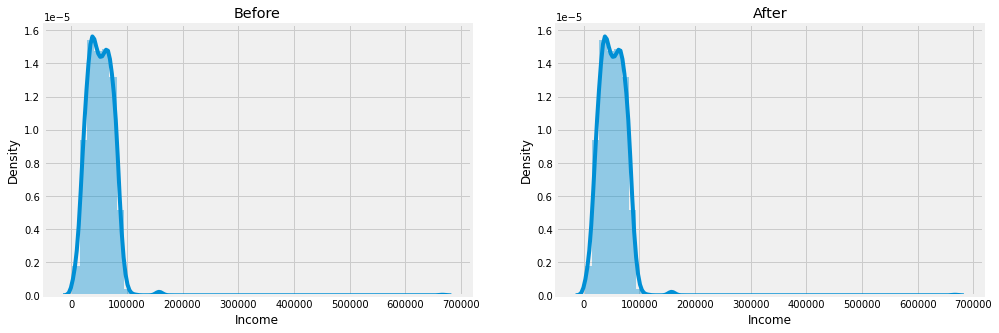

In [105]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.title('Before')
sns.distplot(df_desc['Income'])


plt.subplot(1, 2, 2)
plt.title('After')
sns.distplot(num_atrib['Income'])
plt.show()

After: The data distribution got better

In [106]:
df_feen_train = func_remove_max(df_feen_train, 'Income')

In [107]:
kurt = pd.DataFrame(df_feen_train[['Income']].apply(lambda x: x.kurtosis())).T
skew = pd.DataFrame(df_feen_train[['Income']].apply(lambda x: x.skew())).T
desc = pd.DataFrame(df_feen_train[['Income']].describe())

df_stats = pd.concat([desc,  kurt, skew]).T.reset_index()
df_stats.columns = ['atributos','count', 'mean', 'std','min', '25%', '50%', '75%', 'max', 'kurtosis', 'skew']
df_stats

,atributos,count,mean,std,min,25%,50%,75%,max,kurtosis,skew
0,Income,1551.0,51588.009026,21716.82091,1730.0,34650.0,50737.0,67848.5,160803.0,0.959477,0.42764


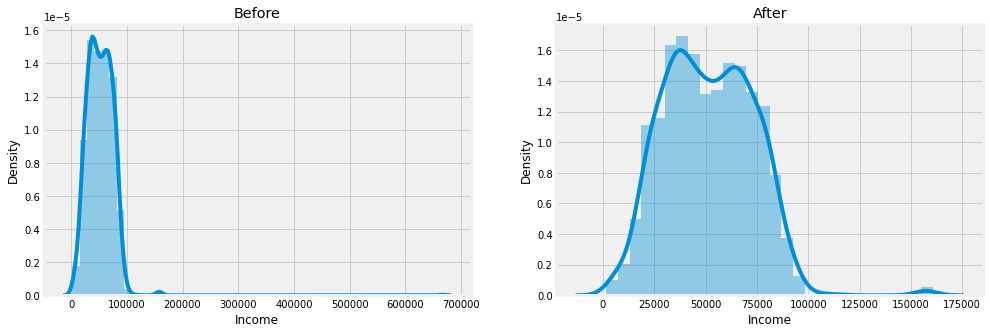

In [108]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.title('Before')
sns.distplot(df_desc['Income'])


plt.subplot(1, 2, 2)
plt.title('After')
sns.distplot(df_feen_train['Income'])
plt.show()

## 6.3 Deriving Features

**Create Feature:**
- **Total Spent in the last 2 years**
- **Rate Amount Spent on Gold Products and Total Spent**

In [109]:
cols = ['MntSweetProducts', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntWines']
df_feen_train = func_total_and_rate(df_feen_train, cols)
df_feen_train

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,total_spent,rate_gold_total
994,1640,1954,Graduation,Divorced,64587.0,1,1,22/06/2014,49,66,...,3,0,0,0,0,0,0,0,88,0.227273
2162,977,1957,Graduation,Together,47320.0,0,1,01/08/2013,10,200,...,6,0,0,0,0,0,0,0,395,0.048101
906,10150,1961,Graduation,Single,86429.0,0,0,21/11/2013,10,464,...,2,0,0,0,1,0,0,1,1412,0.026204
572,8181,1978,2n Cycle,Single,38593.0,1,0,13/09/2013,42,51,...,8,0,0,0,0,0,0,0,153,0.156863
1877,1399,1958,Graduation,Married,72905.0,0,0,21/01/2014,52,407,...,1,0,0,0,1,0,0,0,1312,0.154726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,10785,1969,Graduation,Married,44078.0,1,1,19/06/2014,17,24,...,5,0,0,0,0,0,0,0,37,0.108108
1095,9964,1979,Graduation,Single,61825.0,0,1,07/08/2013,56,162,...,4,0,0,0,0,0,0,0,397,0.068010
1130,3412,1951,Master,Married,67381.0,0,1,15/01/2013,67,815,...,7,0,1,0,0,0,0,0,887,0.078918
1294,2811,1963,PhD,Single,48918.0,1,1,12/04/2014,21,52,...,4,0,0,0,0,0,0,0,61,0.016393


In [110]:
df_feen_test = func_total_and_rate(df_feen_test, cols)

**Create Feature:**
- **Marital Status 2- Alone + Absurd + YOLO + Single = Single**

In [111]:
df_feen_train = func_new_marital_status(df_feen_train)
df_feen_train

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,total_spent,rate_gold_total,Marital_Status_2
994,1640,1954,Graduation,Divorced,64587.0,1,1,22/06/2014,49,66,...,0,0,0,0,0,0,0,88,0.227273,Divorced
2162,977,1957,Graduation,Together,47320.0,0,1,01/08/2013,10,200,...,0,0,0,0,0,0,0,395,0.048101,Together
906,10150,1961,Graduation,Single,86429.0,0,0,21/11/2013,10,464,...,0,0,0,1,0,0,1,1412,0.026204,Single
572,8181,1978,2n Cycle,Single,38593.0,1,0,13/09/2013,42,51,...,0,0,0,0,0,0,0,153,0.156863,Single
1877,1399,1958,Graduation,Married,72905.0,0,0,21/01/2014,52,407,...,0,0,0,1,0,0,0,1312,0.154726,Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,10785,1969,Graduation,Married,44078.0,1,1,19/06/2014,17,24,...,0,0,0,0,0,0,0,37,0.108108,Married
1095,9964,1979,Graduation,Single,61825.0,0,1,07/08/2013,56,162,...,0,0,0,0,0,0,0,397,0.068010,Single
1130,3412,1951,Master,Married,67381.0,0,1,15/01/2013,67,815,...,0,1,0,0,0,0,0,887,0.078918,Married
1294,2811,1963,PhD,Single,48918.0,1,1,12/04/2014,21,52,...,0,0,0,0,0,0,0,61,0.016393,Single


In [112]:
df_feen_train.groupby('Marital_Status_2').size()

Marital_Status_2
Divorced    159
Married     610
Single      330
Together    403
Widow        49
dtype: int64

In [113]:
df_feen_test = func_new_marital_status(df_feen_test)

**Create Feature:**
- **Days since registration**

In [114]:
df_feen_train = func_days_since_registration(df_feen_train)    
df_feen_train

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,total_spent,rate_gold_total,Marital_Status_2,days_since_registration
994,1640,1954,Graduation,Divorced,64587.0,1,1,49,66,0,...,0,0,0,0,0,0,88,0.227273,Divorced,3181
2162,977,1957,Graduation,Together,47320.0,0,1,10,200,19,...,0,0,0,0,0,0,395,0.048101,Together,3506
906,10150,1961,Graduation,Single,86429.0,0,0,10,464,28,...,0,0,1,0,0,1,1412,0.026204,Single,3394
572,8181,1978,2n Cycle,Single,38593.0,1,0,42,51,12,...,0,0,0,0,0,0,153,0.156863,Single,3463
1877,1399,1958,Graduation,Married,72905.0,0,0,52,407,114,...,0,0,1,0,0,0,1312,0.154726,Married,3333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,10785,1969,Graduation,Married,44078.0,1,1,17,24,1,...,0,0,0,0,0,0,37,0.108108,Married,3184
1095,9964,1979,Graduation,Single,61825.0,0,1,56,162,50,...,0,0,0,0,0,0,397,0.068010,Single,3500
1130,3412,1951,Master,Married,67381.0,0,1,67,815,8,...,1,0,0,0,0,0,887,0.078918,Married,3704
1294,2811,1963,PhD,Single,48918.0,1,1,21,52,0,...,0,0,0,0,0,0,61,0.016393,Single,3252


In [115]:
df_feen_test = func_days_since_registration(df_feen_test)  

**Create Feature:**
- **Kidhome - 0 = 1 ; [1, 2] = 1**

In [116]:
df_feen_train = func_kidhome(df_feen_train)
df_feen_train.groupby('Kidhome').size()

Kidhome
0    873
1    678
dtype: int64

In [117]:
df_feen_test = func_kidhome(df_feen_test)

**Create Feature:**
- **Teenhome - 0 = 1 ; [1, 2] = 1**

In [118]:
df_feen_train = func_teenhome(df_feen_train)
df_feen_train.groupby('Teenhome').size()

Teenhome
0    813
1    738
dtype: int64

In [119]:
df_feen_test = func_teenhome(df_feen_test)

## 6.4 Missing Value

In [120]:
df_feen_train.shape

(1551, 30)

In [121]:
df_feen_test.shape

(672, 30)

In [122]:
df_feen_train.isna().sum().sort_values(ascending=False).head()

ID                  0
Year_Birth          0
Marital_Status_2    0
rate_gold_total     0
total_spent         0
dtype: int64

In [123]:
df_feen_test.isna().sum().sort_values(ascending=False).head()

Income                 8
ID                     0
NumCatalogPurchases    0
Marital_Status_2       0
rate_gold_total        0
dtype: int64

# 7.0 Preprocessing

In [124]:
df_prep_train = df_feen_train.copy()
df_prep_test = df_feen_test.copy()

In [125]:
col_exc = [
    'ID'
]

col_prep_mms = df_prep_train.select_dtypes(include=['int64', 'float64']).columns

mms = MinMaxScaler()
mms_fit = mms.fit(df_prep_train[col_prep_mms])

df_prep_train_scaled = pd.DataFrame(mms_fit.transform(df_prep_train[col_prep_mms]), columns = col_prep_mms)

col_add = list(df_prep_train.select_dtypes(exclude=['int64', 'float64']).columns) + col_exc

for i in col_add:
    df_prep_train_scaled[i] = df_prep_train[i].values
# a = df_prep_train_scaled.iloc[[10]]
# b = df_prep_train[col_add].iloc[[10]]
# a.merge(b, left_on='ID', right_on='ID')
df_prep_train_scaled.iloc[[10]]

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,total_spent,rate_gold_total,days_since_registration,Education,Marital_Status,Marital_Status_2
10,1176,0.762887,0.154005,1.0,0.0,0.505051,0.00134,0.030151,0.002319,0.011583,...,0.0,0.0,0.0,0.0,0.004825,0.238311,0.400572,Graduation,Married,Married


## 7.1 Normalization

Test to see if the features have a normal distribution.

Result: None of the 26 features had a normal distribution and due to it we will not do the normalization.

In [126]:
def test_stat(df, statistical_significance):
    cols = df.select_dtypes(include=['int64', 'float64']).drop(columns='ID').columns
    list_col = []
    for col in cols:
        p_value = stats.shapiro(df[col])[1]
        if p_value <= statistical_significance:
            list_col.append(col)
    return list_col

In [127]:
print(f'None of the {len(test_stat(df_prep_train, 0.05))} features had a normal distribution')
test_stat(df_prep_train, 0.05)

None of the 26 features had a normal distribution


['Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response',
 'total_spent',
 'rate_gold_total',
 'days_since_registration']

## 7.2 Rescaling

In [128]:
# Numerical Features
df_prep_train.select_dtypes(include=['int64', 'float64']).columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'total_spent',
       'rate_gold_total', 'days_since_registration'],
      dtype='object')

**Min Max Scaler**

Year_Birth - Min Max Scaler

Income - Min Max Scaler

NumWebVisitsMonth - Min Max Scaler

Recency - Min Max Scaler

MntWines - Min Max Scaler

MntFruits - Min Max Scaler

MntMeatProducts - Min Max Scaler

MntFishProducts - Min Max Scaler

MntSweetProducts - Min Max Scaler

MntGoldProds - Min Max Scaler

NumDealsPurchases - Min Max Scaler

NumWebPurchases - Min Max Scaler

NumCatalogPurchases - Min Max Scaler

NumStorePurchases - Min Max Scaler

days_since_registration - Min Max Scaler

total_spent - Min Max Scaler

rate_gold_total - Min Max Scaler

**Disregard**

ID - Disregard

Kidhome - Disregard. Binary

Teenhome - Disregard. Binary

AcceptedCmp3 - Disregard. Binary

AcceptedCmp4 - Disregard. Binary

AcceptedCmp5 - Disregard. Binary

AcceptedCmp1 - Disregard. Binary

AcceptedCmp2 - Disregard. Binary

Complain - Disregard. Binary

Response - Disregard. Binary


### 7.2.1 Min Max Scaler

In [129]:
col_exc = [
    'ID'
]

col_prep_mms = df_prep_train.select_dtypes(include=['int64', 'float64']).drop(columns = col_exc).columns

mms = MinMaxScaler()
mms_fit = mms.fit(df_prep_train[col_prep_mms])

In [130]:
# Train
df_prep_train_scaled = pd.DataFrame(mms_fit.transform(df_prep_train[col_prep_mms]), columns = col_prep_mms)

col_add = list(df_prep_train.select_dtypes(exclude=['int64', 'float64']).columns) + col_exc

for i in col_add:
    df_prep_train_scaled[i] = df_prep_train[i].values
    
df_prep_train_scaled.drop(columns = col_add).describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,1551.0,0.722188,0.122857,0.0,0.618557,0.731959,0.814433,1.0
Income,1551.0,0.313428,0.136521,0.0,0.206949,0.308079,0.415649,1.0
Kidhome,1551.0,0.437137,0.496193,0.0,0.000000,0.000000,1.000000,1.0
Teenhome,1551.0,0.475822,0.499576,0.0,0.000000,0.000000,1.000000,1.0
Recency,1551.0,0.488105,0.290609,0.0,0.242424,0.494949,0.737374,1.0
MntWines,1551.0,0.200258,0.228260,0.0,0.014735,0.108506,0.333222,1.0
MntFruits,1551.0,0.130903,0.198689,0.0,0.005025,0.040201,0.160804,1.0
MntMeatProducts,1551.0,0.097300,0.134037,0.0,0.008696,0.037101,0.134493,1.0
MntFishProducts,1551.0,0.143621,0.208790,0.0,0.011583,0.046332,0.189189,1.0
MntSweetProducts,1551.0,0.101729,0.154515,0.0,0.003817,0.030534,0.125954,1.0


In [131]:
# Test
df_prep_test_scaled = pd.DataFrame(mms_fit.transform(df_prep_test[col_prep_mms]), columns = col_prep_mms)

col_add = list(df_prep_test.select_dtypes(exclude=['int64', 'float64']).columns) + col_exc

for i in col_add:
    df_prep_test_scaled[i] = df_prep_test[i].values
    
df_prep_test_scaled.drop(columns = col_add).describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,672.0,0.713212,0.124912,-0.061856,0.618557,0.721649,0.804124,1.000000
Income,664.0,0.321436,0.132416,0.016961,0.220778,0.324439,0.426378,1.010021
Kidhome,672.0,0.385417,0.487056,0.000000,0.000000,0.000000,1.000000,1.000000
Teenhome,672.0,0.502976,0.500364,0.000000,0.000000,1.000000,1.000000,1.000000
Recency,672.0,0.512566,0.296181,0.000000,0.262626,0.515152,0.777778,1.000000
MntWines,672.0,0.212553,0.219717,0.000000,0.020596,0.136973,0.341427,0.989953
MntFruits,672.0,0.134646,0.202410,0.000000,0.010050,0.040201,0.165829,1.000000
MntMeatProducts,672.0,0.094853,0.119856,0.000580,0.009855,0.042319,0.133623,0.568696
MntFishProducts,672.0,0.148120,0.216650,0.000000,0.010618,0.042471,0.193050,0.965251
MntSweetProducts,672.0,0.105632,0.161356,0.000000,0.007634,0.034351,0.126908,0.755725


## 7.3 Transformation

### 7.3.1 One Hot Encoding - Marital_Status

In [132]:
# Marital Status
df_prep_train_scaled = pd.get_dummies(
    df_prep_train_scaled, 
    prefix=['Marital_Status'], 
    columns=['Marital_Status_2']
)
df_prep_train_scaled = df_prep_train_scaled.drop(columns='Marital_Status')
df_prep_train_scaled

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,total_spent,rate_gold_total,days_since_registration,Education,ID,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,0.567010,0.395146,1.0,1.0,0.494949,0.044206,0.000000,0.009275,0.000000,0.022901,...,0.033776,0.096287,0.010014,Graduation,1640,1,0,0,0,0
1,0.597938,0.286598,0.0,1.0,0.101010,0.133958,0.095477,0.064348,0.193050,0.057252,...,0.157218,0.020379,0.474964,Graduation,977,0,0,0,1,0
2,0.639175,0.532454,0.0,0.0,0.101010,0.310784,0.140704,0.506087,0.111969,0.068702,...,0.566144,0.011102,0.314735,Graduation,10150,0,0,1,0,0
3,0.814433,0.231736,1.0,0.0,0.424242,0.034159,0.060302,0.028406,0.065637,0.091603,...,0.059912,0.066457,0.413448,2n Cycle,8181,0,0,1,0,0
4,0.608247,0.447436,0.0,0.0,0.525253,0.272605,0.572864,0.257971,0.698842,0.629771,...,0.525935,0.065552,0.227468,Graduation,1399,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546,0.721649,0.266217,1.0,1.0,0.171717,0.016075,0.005025,0.005797,0.007722,0.000000,...,0.013269,0.045802,0.014306,Graduation,10785,0,1,0,0,0
1547,0.824742,0.377783,0.0,1.0,0.565657,0.108506,0.251256,0.057971,0.212355,0.114504,...,0.158022,0.028813,0.466381,Graduation,9964,0,0,1,0,0
1548,0.536082,0.412710,0.0,1.0,0.676768,0.545881,0.040201,0.030725,0.042471,0.000000,...,0.355046,0.033435,0.758226,Master,3412,0,1,0,0,0
1549,0.659794,0.296644,1.0,1.0,0.212121,0.034829,0.000000,0.005217,0.000000,0.000000,...,0.022919,0.006945,0.111588,PhD,2811,0,0,1,0,0


In [133]:
df_prep_train_scaled.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'total_spent',
       'rate_gold_total', 'days_since_registration', 'Education', 'ID',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow'],
      dtype='object')

In [134]:
df_prep_test_scaled = pd.get_dummies(df_prep_test_scaled, prefix=['Marital_Status'], columns=['Marital_Status_2']).drop(columns='Marital_Status')
df_prep_test_scaled

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,total_spent,rate_gold_total,days_since_registration,Education,ID,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,0.556701,0.243498,0.0,1.0,0.787879,0.283992,0.085427,0.068406,0.027027,0.087786,...,0.235223,0.029491,0.763948,Graduation,2607,0,0,1,0,0
1,0.628866,0.290345,0.0,1.0,0.727273,0.338245,0.000000,0.015072,0.000000,0.000000,...,0.211902,0.059840,0.835479,Graduation,7247,0,0,0,0,1
2,0.752577,0.078316,0.0,0.0,0.404040,0.001340,0.035176,0.006377,0.061776,0.045802,...,0.017692,0.238311,0.695279,Basic,5802,0,1,0,0,0
3,0.721649,0.470998,0.0,0.0,0.919192,0.492967,0.316583,0.548406,0.845560,0.721374,...,0.864093,0.024794,0.453505,Graduation,2147,0,0,0,1,0
4,0.608247,0.398974,0.0,1.0,0.343434,0.497656,0.095477,0.104928,0.046332,0.000000,...,0.382388,0.088725,0.484979,Graduation,3759,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.773196,0.413112,0.0,1.0,0.636364,0.507033,0.402010,0.125797,0.111969,0.305344,...,0.466023,0.004007,0.981402,Graduation,10897,0,1,0,0,0
668,0.567010,0.429451,0.0,1.0,0.464646,0.718687,0.000000,0.144928,0.590734,0.053435,...,0.597507,0.003981,0.709585,Graduation,10092,1,0,0,0,0
669,0.536082,0.324266,0.0,0.0,0.323232,0.161420,0.000000,0.006957,0.000000,0.000000,...,0.100121,0.041864,0.463519,PhD,8104,0,1,0,0,0
670,0.618557,0.353467,0.0,1.0,0.242424,0.194240,0.296482,0.102609,0.297297,0.019084,...,0.242863,0.020208,0.449213,Graduation,9483,0,0,0,1,0


In [135]:
df_prep_test_scaled.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'total_spent',
       'rate_gold_total', 'days_since_registration', 'Education', 'ID',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow'],
      dtype='object')

### 7.3.2 Ordinal Encoding - Education

In [136]:
df_prep_train_scaled.Education.drop_duplicates()

0     Graduation
3       2n Cycle
5         Master
21           PhD
63         Basic
Name: Education, dtype: object

In [137]:
# Ordinal Enconding da variável Education
education_dict = {'Basic': 0, 'Graduation': 1, '2n Cycle': 2, 'Master': 3, 'PhD': 4}

#Train
df_prep_train_scaled['Education'] = df_prep_train_scaled['Education'].map(education_dict)

# Test
df_prep_test_scaled['Education'] = df_prep_test_scaled['Education'].map(education_dict)

In [138]:
df_prep_train_scaled[['Education']].value_counts()

Education
1            794
4            336
3            242
2            141
0             38
dtype: int64

In [139]:
df_prep_test_scaled[['Education']].value_counts()

Education
1            325
4            146
3            124
2             61
0             16
dtype: int64

In [140]:
print(f'df_prep_train_scaled: {df_prep_train_scaled.shape}')
print(f'df_prep_test_scaled: {df_prep_test_scaled.shape}')

df_prep_train_scaled: (1551, 33)
df_prep_test_scaled: (672, 33)


# 8.0 Feature Selection

In [141]:
df_fs_train = df_prep_train_scaled.copy()
df_fs_test = df_prep_test_scaled.copy()

In [142]:
df_fs_train.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'total_spent',
       'rate_gold_total', 'days_since_registration', 'Education', 'ID',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow'],
      dtype='object')

### 8.1 Drop ID

In [143]:
col_drop = ['ID']

df_fs_train = df_fs_train.drop(col_drop, axis=1)
df_fs_test = df_fs_test.drop(col_drop, axis=1)

In [144]:
df_fs_train.isna().sum().sort_values(ascending=False).head()

Year_Birth                 0
Income                     0
Marital_Status_Together    0
Marital_Status_Single      0
Marital_Status_Married     0
dtype: int64

## 8.2 Boruta como selecionador de features

In [145]:
X_train_b = df_fs_train.drop('Response', axis = 1)
y_train_b = df_fs_train['Response']

X_train_values = X_train_b.values
y_train_values = y_train_b.values.ravel()

In [146]:
# Random Forest Regressor
rf = RandomForestRegressor(n_jobs = -1)

# Criando Boruta
boruta = BorutaPy(rf, n_estimators = 'auto', verbose = 2, random_state = 42).fit(X_train_values, y_train_values)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	23
Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	23
Iteration: 	10 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	23
Iteration: 	11 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	23
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	24
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	24
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	24
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	24
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	24
I

In [147]:
# Best Features
col_selected = list(boruta.support_)

list_col_boruta_result = X_train_b.loc[:,col_selected].columns.to_list()
list_col_boruta_result

['Recency',
 'MntMeatProducts',
 'AcceptedCmp3',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'rate_gold_total',
 'days_since_registration']

In [148]:
list_col_boruta = list_col_boruta_result.copy()
list_col_boruta

['Recency',
 'MntMeatProducts',
 'AcceptedCmp3',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'rate_gold_total',
 'days_since_registration']

## 8.3 Correlation

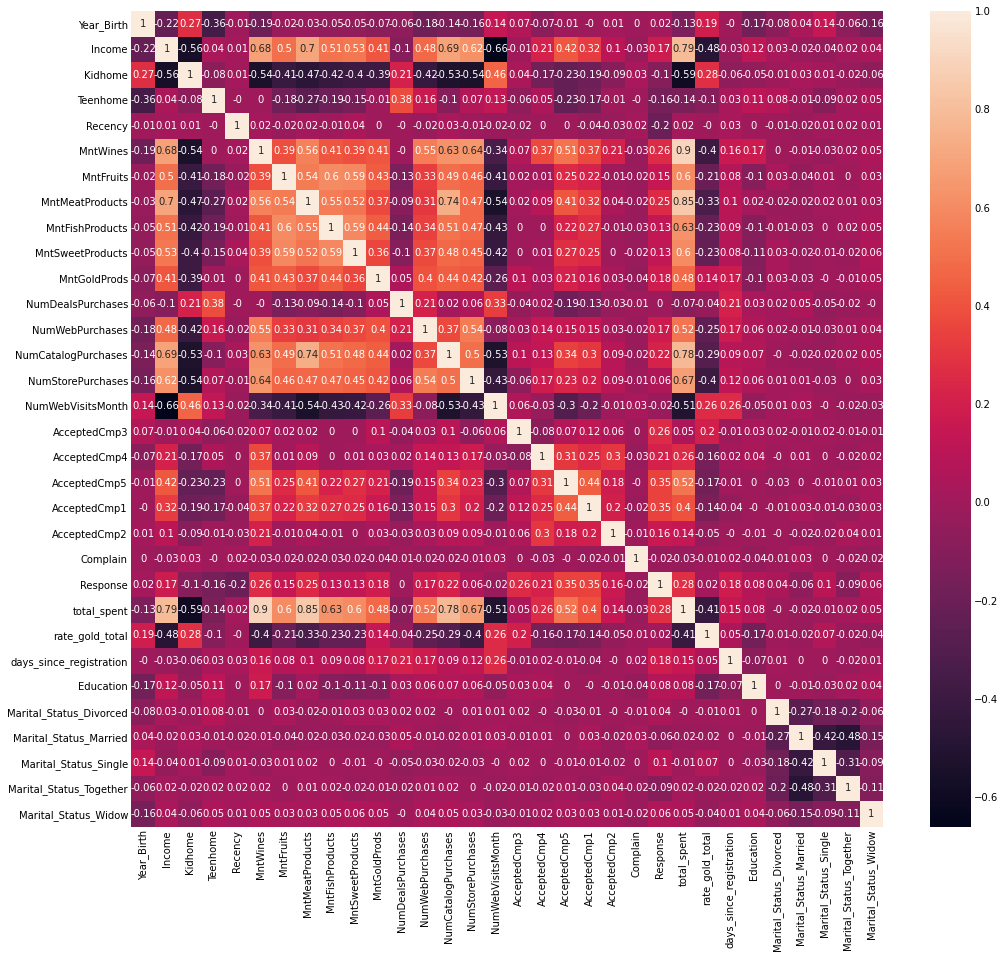

In [149]:
plt.figure(figsize=(15,15))

# col_corr = df_fs_train.drop(['total_spent', 'rate_gold_total'], axis=1).columns
col_corr = df_fs_train.columns
corr = df_fs_train[col_corr].corr(method = 'pearson').round(2)

sns.heatmap(corr, annot=True)

plt.show()

In [150]:
corr_test = corr
corr_test['Response'] = corr_test['Response'].apply(lambda x: x if x > 0 else x * -1)
corr_test = (corr_test[['Response']].sort_values(by='Response', ascending = False)
             .reset_index()
             .rename(columns = {'index': 'cols'})
            )


corr_test = corr_test.head(25)
corr_test = corr_test[~corr_test['cols'].isin(['Response'])]['cols']
corr_test

1                AcceptedCmp1
2                AcceptedCmp5
3                 total_spent
4                    MntWines
5                AcceptedCmp3
6             MntMeatProducts
7         NumCatalogPurchases
8                AcceptedCmp4
9                     Recency
10               MntGoldProds
11    days_since_registration
12            NumWebPurchases
13                     Income
14               AcceptedCmp2
15                   Teenhome
16                  MntFruits
17           MntSweetProducts
18            MntFishProducts
19      Marital_Status_Single
20                    Kidhome
21    Marital_Status_Together
22                  Education
23     Marital_Status_Married
24       Marital_Status_Widow
Name: cols, dtype: object

Features selected

In [151]:
add_list = corr_test 
list_col_boruta2 = list_col_boruta.copy()

for i in add_list:
    list_col_boruta2.append(i)
list_col_boruta2 = list(set(list_col_boruta2))
list_col_boruta2

['MntFruits',
 'AcceptedCmp5',
 'rate_gold_total',
 'MntGoldProds',
 'MntSweetProducts',
 'MntWines',
 'MntMeatProducts',
 'NumWebPurchases',
 'Kidhome',
 'AcceptedCmp3',
 'Marital_Status_Widow',
 'Teenhome',
 'MntFishProducts',
 'Marital_Status_Together',
 'AcceptedCmp2',
 'AcceptedCmp4',
 'Recency',
 'NumCatalogPurchases',
 'AcceptedCmp1',
 'days_since_registration',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Income',
 'Education',
 'total_spent']

In [152]:
to_drop = []

list_cols_model = list_col_boruta2.copy()

for col in to_drop:
    list_cols_model.remove(col)
list_cols_model

['MntFruits',
 'AcceptedCmp5',
 'rate_gold_total',
 'MntGoldProds',
 'MntSweetProducts',
 'MntWines',
 'MntMeatProducts',
 'NumWebPurchases',
 'Kidhome',
 'AcceptedCmp3',
 'Marital_Status_Widow',
 'Teenhome',
 'MntFishProducts',
 'Marital_Status_Together',
 'AcceptedCmp2',
 'AcceptedCmp4',
 'Recency',
 'NumCatalogPurchases',
 'AcceptedCmp1',
 'days_since_registration',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Income',
 'Education',
 'total_spent']

# 9.0 Missing Values

In [153]:
df_fs_test.isna().sum().sort_values(ascending=False).head()

Income                     8
Year_Birth                 0
Marital_Status_Together    0
Marital_Status_Single      0
Marital_Status_Married     0
dtype: int64

In [154]:
df_fs_test = df_fs_test.dropna()
df_fs_test.isna().sum().sort_values(ascending=False).head()

Year_Birth                 0
Income                     0
Marital_Status_Together    0
Marital_Status_Single      0
Marital_Status_Married     0
dtype: int64

In [155]:
X_imb_train = df_fs_train[list_cols_model].values
y_imb_train = df_fs_train['Response']

X_test = df_fs_test[list_cols_model].values
y_test = df_fs_test['Response']

In [156]:
print(X_imb_train.shape)
print(y_imb_train.shape)
print(X_test.shape)
print(y_test.shape)

(1551, 25)
(1551,)
(664, 25)
(664,)


# 10.0 Imbalance Treatment - Oversampling

In [157]:
df_fs_train.groupby('Response').size()

Response
0.0    1313
1.0     238
dtype: int64

In [158]:
from sklearn.utils import resample
df_train_imbalanced = df_fs_train
df_train_over = resample(
    df_fs_train[df_fs_train['Response']==1],
    replace=True,
    n_samples=len(df_fs_train[df_fs_train['Response']==0]) - df_fs_train.groupby('Response').size()[1],
    random_state=42
)

df_train_balanced = pd.concat([df_train_over, df_train_imbalanced])
print(df_train_balanced.shape)

(2626, 32)


In [159]:
df_train_balanced.groupby('Response').size()

Response
0.0    1313
1.0    1313
dtype: int64

In [160]:
X_train = df_train_balanced[list_cols_model].values
y_train = df_train_balanced['Response']

X_test = df_fs_test[list_cols_model].values
y_test = df_fs_test['Response']

In [161]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2626, 25)
(2626,)
(664, 25)
(664,)


# 11.0 Models

In [162]:
from sklearn.metrics import precision_recall_curve, auc, f1_score
from sklearn.ensemble import AdaBoostClassifier
from scipy.stats import randint
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

In [164]:
seed = 42
model_lr = LogisticRegression(random_state = seed)
model_dt = DecisionTreeClassifier(random_state = seed)
model_rf = RandomForestClassifier(random_state = seed)
model_svm = SVC(random_state = seed)
model_nb = GaussianNB()
model_xgb = XGBClassifier(random_state = seed)
model_gb = GradientBoostingClassifier(random_state = seed)
model_ada = AdaBoostClassifier(random_state = seed)

models = [
    model_lr, 
    model_dt, 
    model_rf, 
    model_svm, 
    model_nb, 
    model_xgb, 
    model_gb, 
    model_ada
]

name = [
    'Logistic Regression', 
    'Decision Tree', 
    'Random Forest', 
    'SVC', 
    'Naive Bayes', 
    'XGBoost', 
    'Gradient Boosting', 
    'AdaBoost Classifier'
]

metric_df = pd.DataFrame()

for i in range(len(models)):
    model = models[i]
    model.fit(X_train, y_train)

    score_model = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    model_precision = precision_score(y_test, y_pred)
    model_recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average = 'macro')
    
        
    metric = {
        'Model': name[i],
        'Accuracy': score_model, 
        'Precision': model_precision, 
        'Recall': model_recall,
        'Roc AuC': roc_auc, 
        'F1': f1
    }

    metric_df = metric_df.append(metric, ignore_index = True)
    
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'Roc AuC', 'F1']
metric_df = metric_df[columns]
    
metric_df

[19:05:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Accuracy,Precision,Recall,Roc AuC,F1
0,Logistic Regression,0.808735,0.404762,0.715789,0.770021,0.698931
1,Decision Tree,0.816265,0.354839,0.347368,0.620960,0.622023
2,Random Forest,0.868976,0.586957,0.284211,0.625409,0.654842
3,SVC,0.826807,0.439024,0.757895,0.798104,0.724204
4,Naive Bayes,0.748494,0.293103,0.536842,0.660337,0.610743
5,XGBoost,0.862952,0.525641,0.431579,0.683276,0.697600
6,Gradient Boosting,0.837349,0.450382,0.621053,0.747257,0.712060
7,AdaBoost Classifier,0.850904,0.485075,0.684211,0.781473,0.738802


[19:05:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


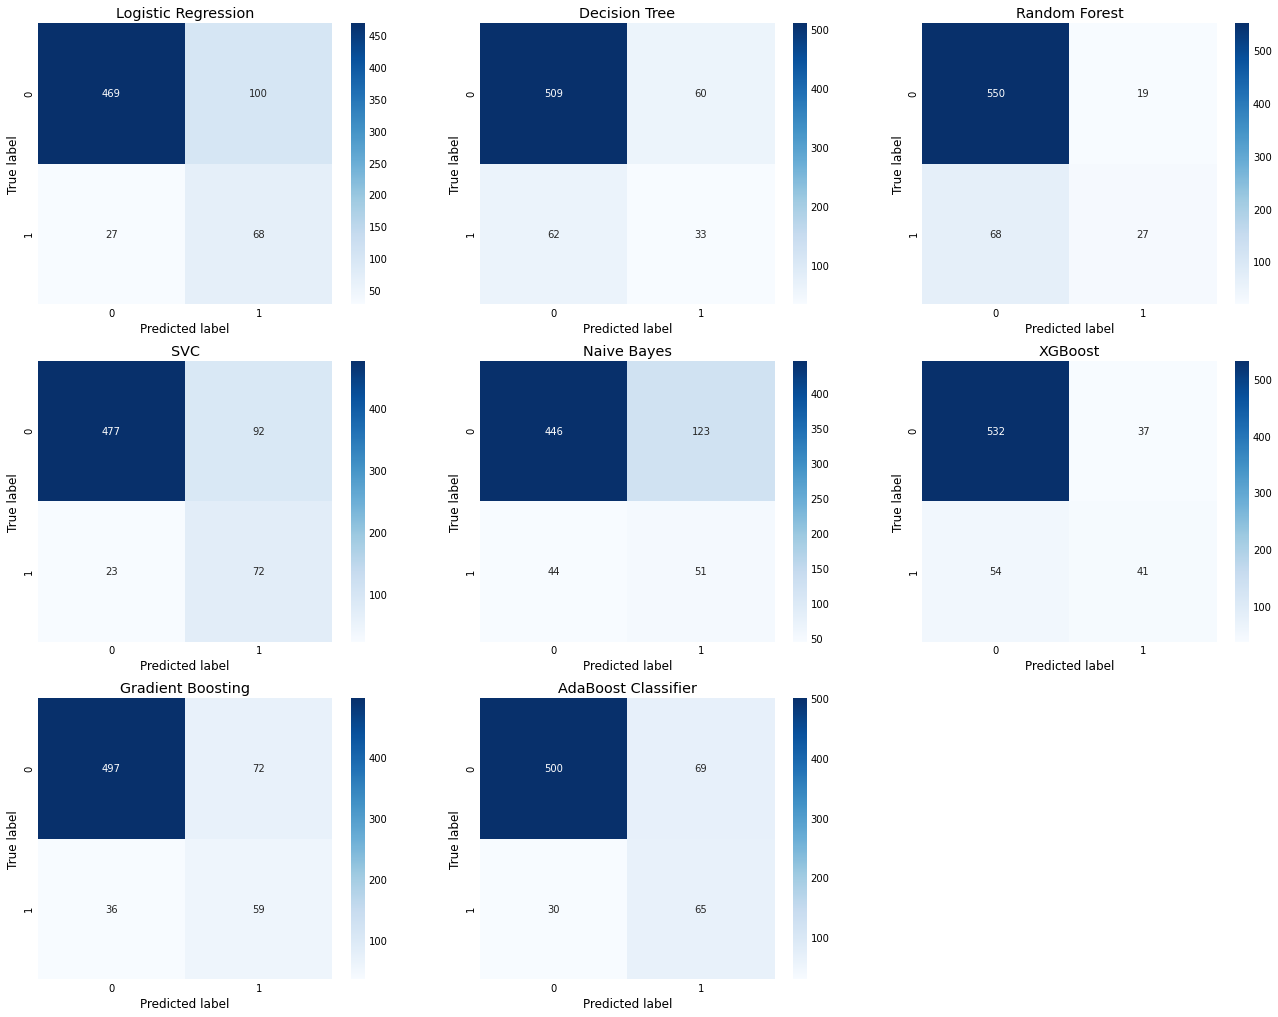

In [165]:
plt.figure(figsize = (20, 30))

for i in range(len(models)):    
    model = models[i]
    model.fit(X_train, y_train)

    score_model = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
                           
    
    plt.subplot(5, 3, i + 1)

    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    plt.title(name[i])
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plt.show()

**Let's go with 3 models for the next step, which is to do the tuning. The models were chosen for having better Recall and Accuracy.**<br>

In [166]:
best_three = metric_df.sort_values('F1', ascending = False).head(3)
best_three

,Model,Accuracy,Precision,Recall,Roc AuC,F1
7,AdaBoost Classifier,0.850904,0.485075,0.684211,0.781473,0.738802
3,SVC,0.826807,0.439024,0.757895,0.798104,0.724204
6,Gradient Boosting,0.837349,0.450382,0.621053,0.747257,0.712060


# 12.0 Financial Impact

### Financial Impact Calculation:

(True Positive * Profit Rate * Average Ticket - True Positive * Campaign Cost Per Customer) - (False Positive * Campaign Cost Per Customer)

True Positive: When the model predicted that the customer would buy and he did<br>
False Positive: When the model predicted that the customer would buy and he didn't<br>

To calculate the financial impact we have to assume some assumptions<br>
Profit Rate: 35%<br>
Campaign Cost Per Customer: $80<br>

In [169]:
def fun_avg_ticket(df):
    col_list = ['MntSweetProducts', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntWines']
    col_list_campaign = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
    
    df['total_spent'] = df[col_list].sum(axis=1)
    df['accepted_campaign'] = df[col_list_campaign].sum(axis=1)

    df = df[df['accepted_campaign'] > 0]
    
    total_spent = df['total_spent'].sum()
    total_accepted_campaign = df['accepted_campaign'].sum()
    
    result_avg_ticket = round(total_spent / total_accepted_campaign, 2)
    
    return result_avg_ticket

In [173]:
df_avg_ticket = df_test.copy()
avg_ticket = fun_avg_ticket(df_avg_ticket)
print(f'Average Ticket by Customer: ${avg_ticket}')

Average Ticket by Customer: $695.67


### The model that had the best financial impact was AdaBoost

In [172]:
df_financial_impact = pd.DataFrame()

profit_rate = 0.35
cost_campaign_per_customer = 80

for a in range(best_three.shape[0]):
    i = best_three.index[a]
    
    model = models[i]
    
    model.fit(X_train, y_train)
    
    score_model = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    fp = cm[0][1]
    tp = cm[1][1]
    
    
    calc = (tp * profit_rate * avg_ticket) - (tp * cost_campaign_per_customer) - (fp * cost_campaign_per_customer)
    
    metric = {
    'Model': name[i],
    'TP': tp, 
    'FP': fp, 
    'Average Ticket by Customer': avg_ticket,
    'Profit Rate': profit_rate,
    'Campaign Cost Per Customer': cost_campaign_per_customer,
    'Financial Impact': round(calc, 2)
    }

    df_financial_impact = df_financial_impact.append(metric, ignore_index = True)
    
columns = ['Model', 'TP', 'FP', 'Average Ticket by Customer', 'Profit Rate', 'Financial Impact']
df_financial_impact = df_financial_impact[columns].sort_values('Financial Impact', ascending = False)

df_financial_impact

,Model,TP,FP,Average Ticket by Customer,Profit Rate,Financial Impact
0,AdaBoost Classifier,65.0,69.0,695.67,0.35,5106.49
1,SVC,72.0,92.0,695.67,0.35,4410.88
2,Gradient Boosting,59.0,72.0,695.67,0.35,3885.59


### Calculation of the financial impact for the others campaigns

In [175]:
dict_bin = {}
df_rate = pd.DataFrame()
lista = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

for i in lista:
    dict_bin[i] = df_desc.groupby(i).size()
    df_rate_temp = pd.DataFrame(dict_bin)

df_rate['Campaign'] = df_rate_temp.columns
df_rate['TP'] = df_rate_temp[1:].T.reset_index()[1]
df_rate['FP'] = df_rate_temp[:1].T.reset_index()[0]
df_rate['Total Samples'] = df_rate['TP'] + df_rate['FP']
df_rate['Precision'] = round(df_rate['TP'] / df_rate['Total Samples'], 2)
df_rate['Average Ticket by Customer'] = avg_ticket
df_rate['Campaign Cost Per Customer'] = cost_campaign_per_customer
df_rate['Profit Rate'] = profit_rate

calc_part1 = (df_rate['TP'] * profit_rate * avg_ticket) - (df_rate['TP'] * cost_campaign_per_customer)
calc_part2 = (df_rate['FP'] * cost_campaign_per_customer)

df_rate['Financial Impact'] = round(calc_part1 - calc_part2, 0)
df_rate

,Campaign,TP,FP,Total Samples,Precision,Average Ticket by Customer,Campaign Cost Per Customer,Profit Rate,Financial Impact
0,AcceptedCmp1,144,2096,2240,0.06,695.67,80,0.35,-144138.0
1,AcceptedCmp2,30,2210,2240,0.01,695.67,80,0.35,-171895.0
2,AcceptedCmp3,163,2077,2240,0.07,695.67,80,0.35,-139512.0
3,AcceptedCmp4,167,2073,2240,0.07,695.67,80,0.35,-138538.0
4,AcceptedCmp5,163,2077,2240,0.07,695.67,80,0.35,-139512.0


## 13.0 Conclusion

To compare the financial impact of the model with the other campaigns, we have to extrapolate the number of customers. Because all other campaigns were shown to 2240 customer and the test with model was only shown to 664

If for **664** customers the model genereted a financial impact of **$ 5106.49**

Then, for **2240** customers the model would generate a financial impact of **$ 17226.72**